<a href="https://colab.research.google.com/github/FiddiCoder/-FIA-Project/blob/main/Movie_Recommender_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [ ]:
import os
import tarfile
from six.moves import urllib
#download dataset

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/imdb_top_1000.csv"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "imdb_top_1000.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [ ]:
#load data
datapath = os.path.join("dataset","")
imdb = pd.read_csv(datapath + "imdb_top_1000.csv")

In [ ]:
#prova stampa
imdb.head(10)

In [ ]:
#download english stopwards (sinossi dei film in inglese)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/stopwords.txt"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "stopwords.txt")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

stopwords = open( datapath + "stopwords.txt")
with open(datapath + "stopwords.txt", "r") as f:
    stopwords = f.read().split("\n")

#Contrariamente all'algoritmo di classificazione, ora sembra esserci il problema inverso: i dati numerici sembrano di poca rilevanza

#Eliminazione colonne con dati numerici (Prova 1)

In [ ]:
imdb = imdb.drop("Gross", axis=1)
imdb = imdb.drop("Released_Year", axis=1)
imdb = imdb.drop("Runtime", axis=1)
imdb = imdb.drop("IMDB_Rating", axis=1)
imdb = imdb.drop("Meta_score", axis=1)
imdb = imdb.drop("No_of_Votes", axis=1)
imdb = imdb.drop("Certificate", axis=1) #stringa che ha scarsa rilevanza

In [ ]:
imdb.head(10)

In [ ]:
#creazione lista che contiene le parole principali utili all'algoritmo
def crea_lista(row):
    stars = row[["Star1","Star2","Star3","Star4"]].to_list()
    lista = " ".join(row["Series_Title"].split() + row["Genre"].split() + row["Overview"].split() + row["Director"].split() + stars )
    #regex che elimina caratteri inutili
    lista = re.sub(r'[^\w\s]', '', lista)
    #rimozione stopwords
    wordlist = lista.split()
    for word in wordlist:
        if word in stopwords:
            lista = lista.replace(" "+word+" ", " ")

    return lista

In [ ]:
imdb["target"] = imdb.apply(crea_lista, axis=1) # metodo apply di pandas permette di applicare la funzione crea_lista ad ogni riga, creando una nuova colonna nel dataset
print(imdb.loc[0, 'target'])

The Shawshank Redemption Drama Two imprisoned men bond number years finding solace eventual redemption acts common decency Frank Darabont Tim Robbins Morgan Freeman Bob Gunton William Sadler


In [ ]:
#prova jaccard similarity

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))
list1 = imdb.loc[0, 'target'].split()
list2 = imdb.loc[1, 'target'].split()
print(list1)
print(list2)
jaccard_similarity(list1, list2)


['The', 'Shawshank', 'Redemption', 'Drama', 'Two', 'imprisoned', 'men', 'bond', 'number', 'years', 'finding', 'solace', 'eventual', 'redemption', 'acts', 'common', 'decency', 'Frank', 'Darabont', 'Tim', 'Robbins', 'Morgan', 'Freeman', 'Bob', 'Gunton', 'William', 'Sadler']
['The', 'Godfather', 'Crime', 'Drama', 'An', 'organized', 'crime', 'dynastys', 'aging', 'patriarch', 'transfers', 'control', 'clandestine', 'empire', 'reluctant', 'son', 'Francis', 'Ford', 'Coppola', 'Marlon', 'Brando', 'Al', 'Pacino', 'James', 'Caan', 'Diane', 'Keaton']


0.038461538461538464

In [ ]:
#applicazione della jaccard similarity tra le tabelle target di un film e i restanti (array monodimensionale)

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

#scelta del film dal quale ottenere i rispettivi film consigliati
id_film = 23   #"La città incantata"
list1 = imdb.loc[id_film, 'target'].split()
result_list = np.empty(1000)

for i in range(1000):
  list2 = imdb.loc[i, 'target'].split()
  result_list[i] = jaccard_similarity(list1, list2)
  print(result_list[i])

0.0
0.0
0.0
0.0
0.0
0.015384615384615385
0.0
0.0
0.016666666666666666
0.0
0.015873015873015872
0.0
0.0
0.014705882352941176
0.0
0.0
0.013157894736842105
0.0
0.0
0.0
0.0
0.01818181818181818
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.014492753623188406
0.0
0.01818181818181818
0.017241379310344827
0.0
0.0
0.0
0.0
0.0
0.0
0.017543859649122806
0.0
0.0
0.016129032258064516
0.03508771929824561
0.0
0.0
0.017857142857142856
0.015151515151515152
0.0
0.0
0.0
0.01818181818181818
0.01639344262295082
0.0
0.014925373134328358
0.0
0.016666666666666666
0.0
0.03571428571428571
0.015151515151515152
0.01639344262295082
0.06896551724137931
0.0
0.015384615384615385
0.015384615384615385
0.016666666666666666
0.05172413793103448
0.0
0.0
0.0
0.08064516129032258
0.0
0.015625
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.016129032258064516
0.0
0.0
0.0
0.0
0.0
0.0
0.018518518518518517
0.015625
0.0
0.01818181818181818
0.0
0.0
0.0
0.0
0.015873015873015872
0.03389830508474576
0.0
0.0
0.0
0.0
0.015384615384615385
0.0
0.0
0.012

In [ ]:
#creazione array contenente i 5 valori più alti ottenuti dalla funzione di jaccard similarity
def Nmaxelements(list1, N):
    final_list = []
    #eliminazione film identità
    list1 = list1[list1 != 1]

    for i in range(0, N):
        max1 = 0

        for j in range(len(list1)):
            if list1[j] > max1:
                max1 = list1[j];

        print(np.where(list1 == max1))
        list1 = list1[list1 != max1]
        final_list.append(max1)

    print(final_list)
    return(final_list)


final_list = Nmaxelements(result_list, 5)

(array([169]),)
(array([407]),)
(array([195]),)
(array([69]),)
(array([156]),)
[0.10909090909090909, 0.08771929824561403, 0.08620689655172414, 0.08064516129032258, 0.078125]


In [ ]:
#funzione che mostra il poster del film
def imshow(index):
    url = imdb.loc[index, "Poster_Link"]
    img = Image.open(BytesIO(requests.get(url).content))
    plt.imshow(img)
    plt.show()

Film input




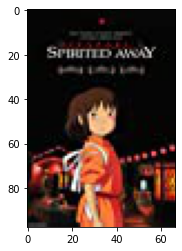



Sen to Chihiro no kamikakushi
------------------------------


Film consigliati:




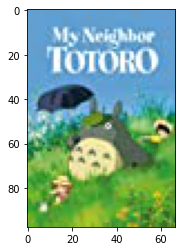



Tonari no Totoro
------------------------------


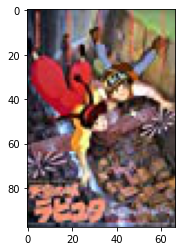



Tenkû no shiro Rapyuta
------------------------------


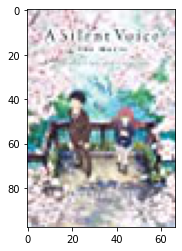



Koe no katachi
------------------------------


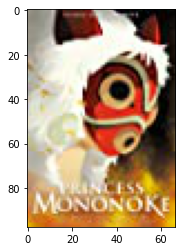



Mononoke-hime
------------------------------


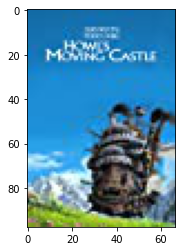



Hauru no ugoku shiro
------------------------------


In [ ]:
#film scelto
print('Film input')
print("\n")
imshow(id_film)
print("\n")
print(imdb.loc[id_film].Series_Title)
print('-'*30)
print("\n")
print('Film consigliati:')
print("\n")
#output dei 5 film consigliati rispetto al film dato in input
for i in range(len(final_list)):
  for j in range(len(result_list)):
    if(final_list[i]==result_list[j]):
      imshow(j)
      print("\n")
      print(imdb.loc[j].Series_Title)
      print('-'*30)